In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
image = cv2.imread('/content/ssssss.JPG')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image, cmap='gray')
plt.show()

error: OpenCV(4.12.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


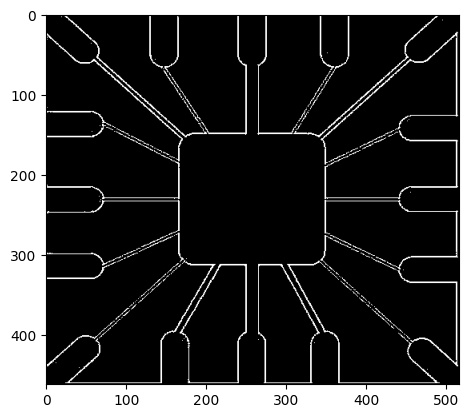

In [ ]:
def isolate_point(image, threshold):
  kernel = np.array([[1, 1, 1],
                     [1, -8, 1],
                     [1, 1, 1]])
  new_img = np.zeros(image.shape)
  for i in range(1, image.shape[0] - 1):
    for j in range(1, image.shape[1] - 1):
      new_img[i, j] = np.sum(image[i-1:i+2, j-1:j+2] * kernel)
      if new_img[i, j] < threshold:
        new_img[i, j] = 0
      else:
        new_img[i, j] = 255
  return new_img

new_img = isolate_point(image, 75)
plt.imshow(new_img, cmap='gray')
plt.show()

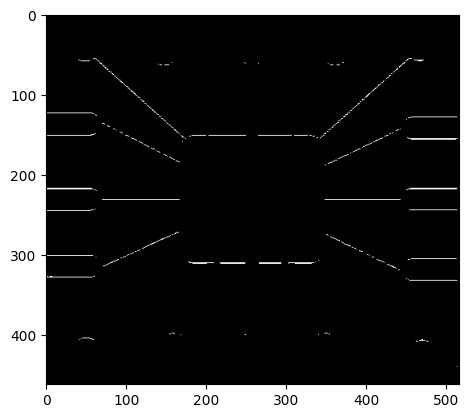

In [ ]:
def Line_detection(image, kernel, threshold):
  new_img = np.zeros(image.shape)
  for i in range(1, image.shape[0] - 1):
    for j in range(1, image.shape[1] -1):
      new_img[i, j] = np.sum(image[i-1:i+2, j-1:j+2] * kernel)
      if new_img[i, j] < threshold:
        new_img[i, j] = 0
      else:
        new_img[i, j] = 255
  return new_img

kernel = np.array([[-1, -1, -1], [2, 2, 2], [-1, -1, -1]])
new_img = Line_detection(image, kernel, 150)
plt.imshow(new_img, cmap='gray')
plt.show()

# Canny

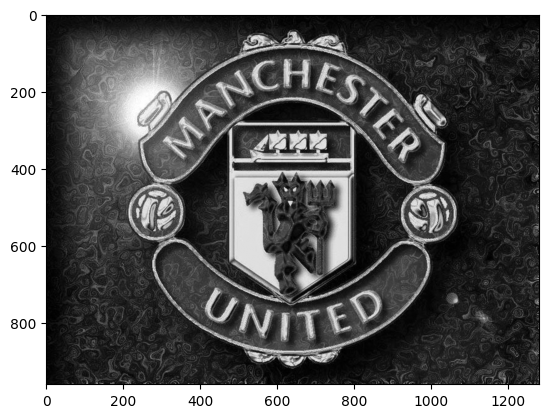

In [ ]:
image = cv2.imread('/content/hinh-anh-dep-nhat-logo-cua-mu_023446904.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.show()

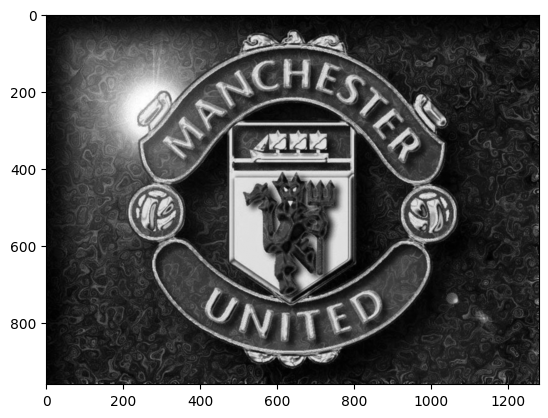

In [ ]:
kernel_size = 3
blur_img = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)
plt.imshow(blur_img, cmap='gray')
plt.show()

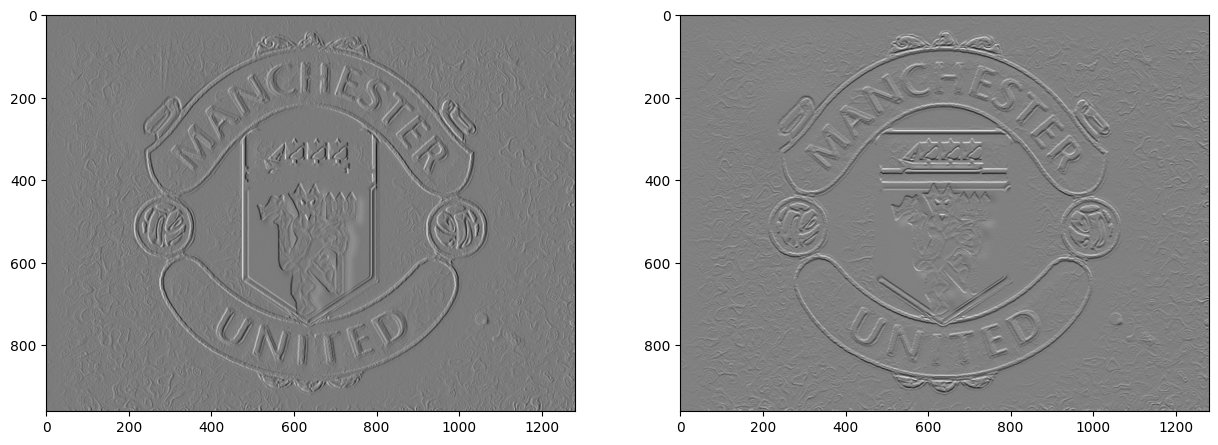

In [ ]:
sobelx = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])
sobely = np.array([[-1, -2, -1],
                   [0, 0, 0],
                   [1 ,2, 1]])
def sobel(image, kernel):
  new_img = np.zeros(image.shape)
  for i in range(1, image.shape[0] - 1):
    for j in range(1, image.shape[1] - 1):
      new_img[i, j] = np.sum(image[i-1:i+2, j-1:j+2] * kernel)
  return new_img
sobelx_image = sobel(blur_img, sobelx)
sobely_image = sobel(blur_img, sobely)
plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.imshow(sobelx_image, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(sobely_image, cmap='gray')
plt.show()

In [ ]:
mag = np.sqrt(sobelx_image**2 - sobely_image**2)
angle = np.arctan(sobely_image, sobelx_image)
angle = angle * 180 / np.pi
angle = (angle + 180) % 180
angle

/tmp/ipython-input-966568837.py:1: RuntimeWarning: invalid value encountered in sqrt
  mag = np.sqrt(sobelx_image**2 - sobely_image**2)


array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,  93.81407483,  94.76364169, ...,   0.        ,
         45.        ,   0.        ],
       [  0.        ,  93.0127875 ,  93.57633437, ..., 135.        ,
         45.        ,   0.        ],
       ...,
       [  0.        ,  92.20259816,  94.39870535, ...,  89.62305952,
         89.28384005,   0.        ],
       [  0.        ,  92.72631099,  96.34019175, ...,  89.54164354,
         89.09061955,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

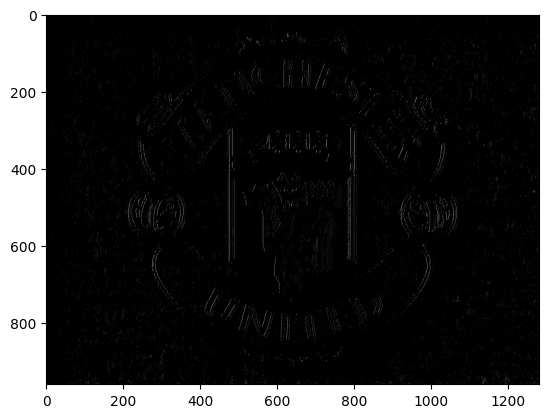

In [ ]:
new_angle = np.zeros(angle.shape)
new_angle[(angle < 22.5) | (angle > 157.5)] = 0
new_angle[(angle >= 22.5) | (angle < 67.5)] = 45
new_angle[(angle >= 67.5) | (angle < 112.5)] = 90
new_angle[(angle >= 112.5) | (angle < 157.5)] = 135

non_max_suppression = np.zeros(mag.shape)
for i in range(1, mag.shape[0] - 1):
  for j in range(1, mag.shape[1] - 1):
    a = new_angle[i, j]
    if a == 0:
      n1, n2 = mag[i, j-1], mag[i, j+1]
    elif a == 45:
      n1, n2 = mag[i-1, j+1], mag[i+1, j-1]
    elif a == 90:
      n1, n2 = mag[i-1, j], mag[i+1, j]
    elif a == 135:
      n1, n2 = mag[i-1, j-1], mag[i+1, j+1]
    if mag[i, j] >= n1 and mag[i, j] >= n2:
      non_max_suppression[i, j] = mag[i, j]

plt.imshow(non_max_suppression, cmap='gray')
plt.show()


In [ ]:
low_thresh = 100
high_thresh = 200
strong = non_max_suppression > high_thresh
weak = (non_max_suppression >= low_thresh) & (non_max_suppression < high_thresh)

edges = np.zeros(non_max_suppression.shape)
edges[strong] = True

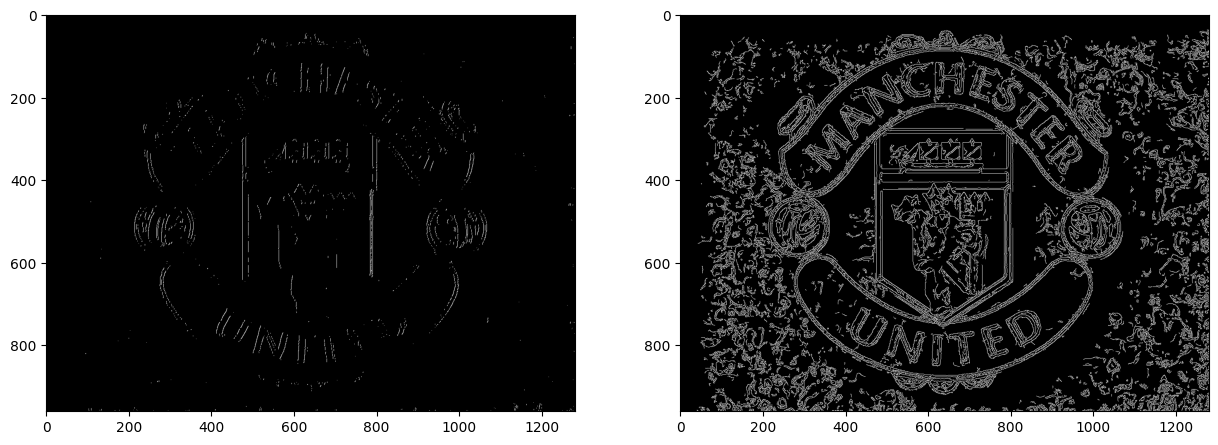

In [ ]:
edges = edges.astype(np.uint8)
result = cv2.Canny(image = image, threshold1=100, threshold2=200)
plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.imshow(edges, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(result, cmap = 'gray')

In [ ]:
def thresholding(img, threshold):
  new_img = np.zeros(img.shape)
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      if img[i,j] < threshold:
        new_img[i, j] = 0
      else:
        new_img[i, j] = 255
  return new_img

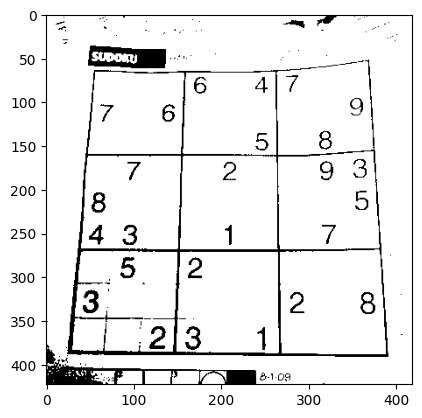

In [ ]:
test = thresholding(cv2.imread('/content/sudoku.jpg', cv2.IMREAD_GRAYSCALE), 50)
plt.imshow(test, cmap='gray')

In [ ]:
def adaptive_threshold(img: np.ndarray, block_size: int, C: int) -> np.ndarray:
  new_img = np.zeros(img.shape)
  for i in range(0, img.shape[0], block_size):
    for j in range(0, img.shape[1], block_size):
      block = img[i: i+block_size, j: j+block_size]
      threshold = np.mean(block) - C
      new_img[i: i+block_size, j: j+block_size] = thresholding(block, threshold)

  return new_img


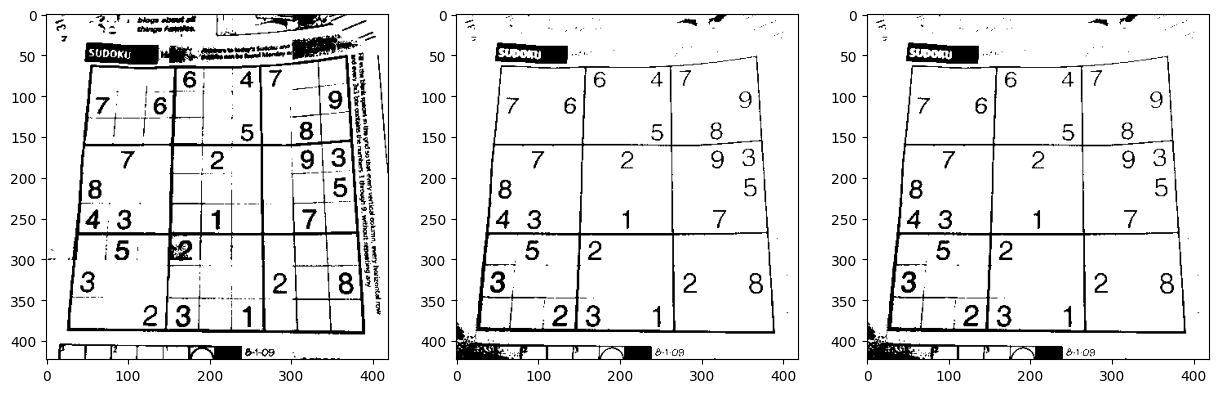

In [ ]:
adaptive_threshold_test = adaptive_threshold(cv2.imread('/content/sudoku.jpg', cv2.IMREAD_GRAYSCALE), 151, 20)
cv2_test = cv2.adaptiveThreshold(cv2.imread('/content/sudoku.jpg', cv2.IMREAD_GRAYSCALE), 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 151, 20)
plt.figure(figsize=(15, 15))
plt.subplot(1, 3, 1)
plt.imshow(adaptive_threshold_test, cmap='gray')
plt.subplot(1, 3, 2)
plt.imshow(test, cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(test, cmap='gray')

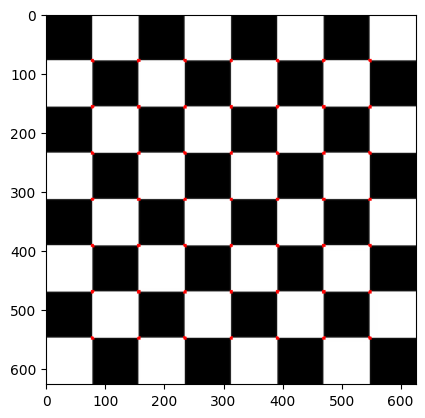

In [ ]:
image = cv2.imread('/content/background-vector-design-seamless-checker-pattern-with-black-white-checkerboard-wallpaper_746337-156.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
dtc = cv2.cornerHarris(gray, 2, 3, 0.04)
dtc = cv2.dilate(dtc, None)
image[dtc > 0.01 * dtc.max()] = [255, 0, 0]
plt.imshow(image)

# Contour

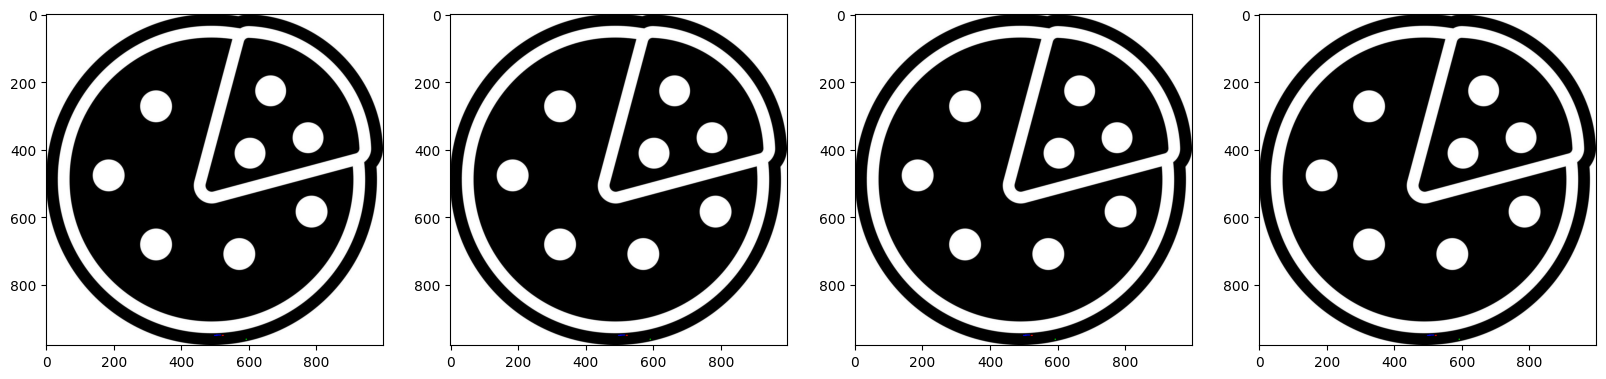

In [ ]:
image = cv2.imread('pizza-icon-or-symbol-in-black-and-white-color-vector.jpg')
kernel = np.ones((3, 3), dtype=np.uint8)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
contours, _ = cv2.findContours(gray, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img_copy = image.copy()

opencv_result_3 = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
res_1 = cv2.polylines(img_copy, [contours[0]], True, (0, 255, 0), 2)
res_2 = cv2.polylines(img_copy, [contours[1]], True, (255, 0, 0), 2)
res_3 = cv2.polylines(img_copy, [contours[2]], True, (0, 0, 255), 2)

plt.figure(figsize=(20, 20))
plt.subplot(1, 4, 1)
plt.imshow(img_copy)
plt.subplot(1, 4, 2)
plt.imshow(res_1)
plt.subplot(1, 4, 3)
plt.imshow(res_2)
plt.subplot(1, 4, 4)
plt.imshow(res_3)

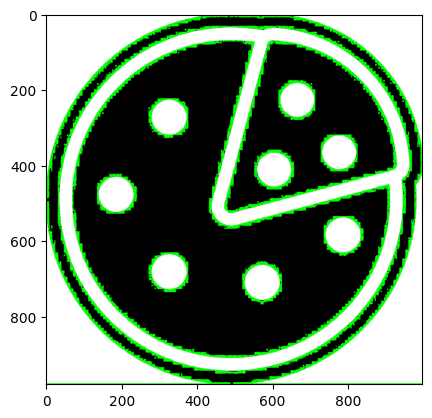

In [ ]:
res = cv2.drawContours(image = img_copy,
                 contours=contours,
                 contourIdx=-1,
                 color=(0, 255, 0),
                 thickness=2)
plt.imshow(res)

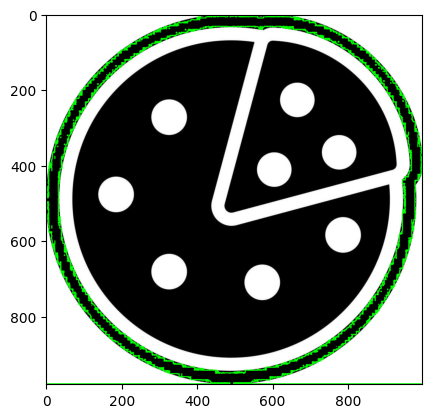

In [ ]:
image = cv2.imread('pizza-icon-or-symbol-in-black-and-white-color-vector.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
contours, hierachy = cv2.findContours(gray, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img_copy = image.copy()

for i in range(len(contours)):
    if hierachy[0][i][3] == -1:
        res = cv2.drawContours(img_copy, contours, i, (0, 255, 0), 2)


plt.imshow(res)

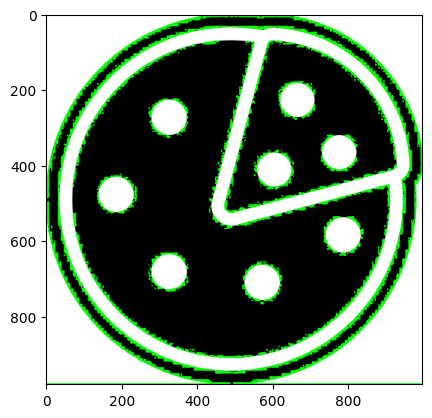

In [ ]:
for i in range(len(contours)):
    if hierachy[0][i][2] == -1:
        cv2.drawContours(img_copy, contours, i, (0, 255, 0), 2)

plt.imshow(img_copy)

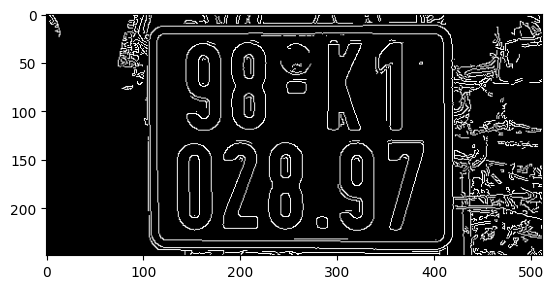

In [6]:
image = cv2.imread('R.jpg', cv2.IMREAD_GRAYSCALE)
img_color = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

canny_img =  cv2.Canny(image=image, threshold1=100, threshold2=255)
plt.imshow(canny_img, cmap='gray')

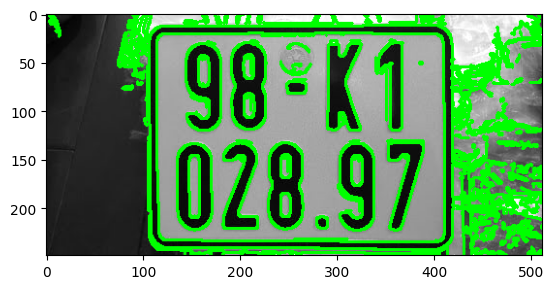

In [67]:
contours, _ = cv2.findContours(canny_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img_copy = image.copy()

res = cv2.drawContours(img_color, contours, contourIdx=-1, color = (0, 255, 0), thickness=2)

plt.imshow(res)

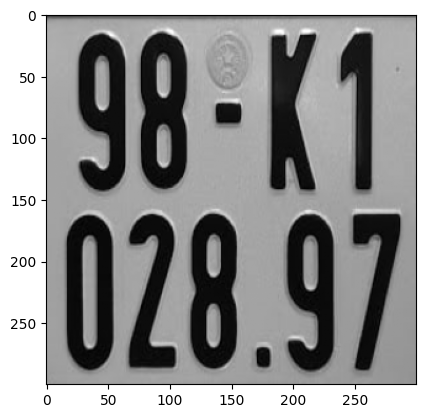

In [105]:
pts1 = np.float32([
    [120, 20],   # top-left
    [400, 20],   # top-right
    [120, 230],  # bottom-left
    [400, 230]   # bottom-right
])
width, height = 300, 300
pts2 = np.float32([
    [0, 0],           # top-left
    [width-1, 0],     # top-right
    [0, height-1],    # bottom-left
    [width-1, height-1]  # bottom-right
])
mattrix = cv2.getPerspectiveTransform(pts1, pts2)
warped = cv2.warpPerspective(image, mattrix, (width, height))
plt.imshow(warped, cmap='gray')

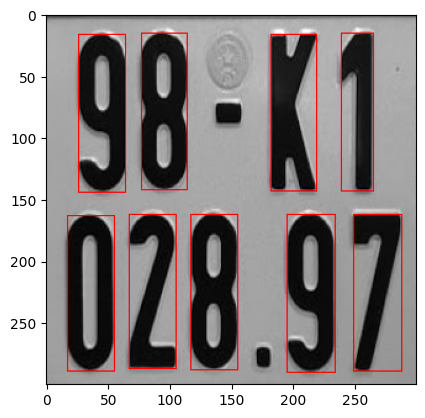

In [109]:
warped_color = cv2.cvtColor(warped, cv2.COLOR_GRAY2BGR)
_, thresh = cv2.threshold(warped, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
char_cnts, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
output = warped_color.copy()
for cnt in char_cnts:
    x, y, w, h = cv2.boundingRect(cnt)
    if 20 < w < 80 and 25 < h < 150:
        cv2.rectangle(output, (x, y), (x+w, y+h), (0, 0, 255), 1)

plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))